In [1]:
#NEW SINE FITTING(Synthetic), CURVE_FIT WITH A CHI_SQUARE EVALUATOR, updated on Tuesday, at 8:17 PM
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Define the sine function for Synthetic Data
def sin_function(t, amp0, freq0, phase0, vert0):
    return amp0 * np.sin(freq0 * t + phase0) + vert0

def fit_function(t, amp, phase, vert):
    return amp * np.sin(2*np.pi * t + phase) + vert

In [3]:
# Generate synthetic data with more noise
t = np.linspace(0, 40 * np.pi, 8)
amp_true, freq_true, phase_true, vert_true = 6.0, 4.0, 4.0, 5.0
y = sin_function(t, amp_true, freq_true, phase_true, vert_true) + np.random.normal(0, 0.4, t.size)


In [4]:
#Phase Folding
period = 2*np.pi/freq_true
phase = (t % period) / period
type(phase)


numpy.ndarray

In [5]:
# Perform the initial fit
params, params_covariance = curve_fit(fit_function, phase, y)
amp_fit, phase_fit, vert_fit = params

# Generate fitted data
freq_fit = freq_true
y_fit = sin_function(t, amp_fit, freq_fit, phase_fit, vert_fit)
print(abs(amp_fit))
print(freq_true)
print(phase_fit)
print(vert_fit)


6.056440611550979
4.0
0.7775304982432615
4.897284507994183


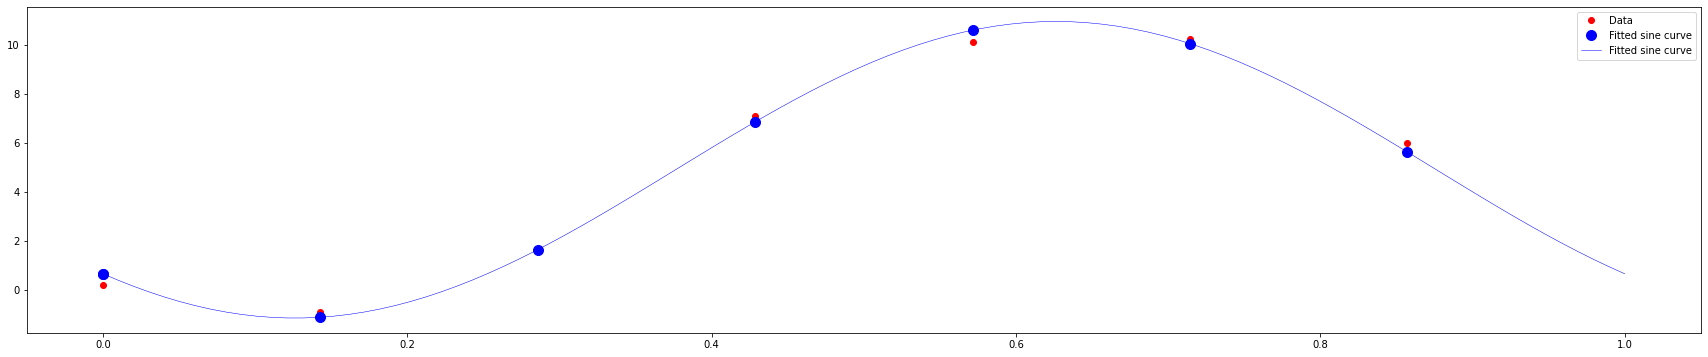

In [10]:
#Plotting
plt.figure(figsize=(30, 6))

plt.plot(phase, y, 'o', label='Data', color='red')
plt.plot(phase, y_fit, '.', markersize = 20, label='Fitted sine curve', color='blue', linewidth=2)

t_fit = np.linspace(0, 1, 100)
y_line = fit_function(t_fit, amp_fit, phase_fit, vert_fit)
plt.plot(t_fit, y_line, label='Fitted sine curve', color='blue', linewidth=.5)

plt.legend()
plt.show()

In [7]:
#import pandas as pd
#lst1 = phase
#lst2 = y
#list = pd.DataFrame(
#    {'phase': lst1,
#     'y': lst2,
#    })
#list_sort = list.sort_values(by='phase', ascending=True)
#type(list_sort)

#phase = list_sort['phase'].astype(int).tolist()
#y = list_sort['y'].astype(int).tolist()
#phase = np.array(phase)

In [8]:
# Error and accuracy calculator
#error = y_fit - y
#chi_square = np.sum((error)**2 / y)